In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../data/" directory

import os
import os.path as osp

date = '20230310'
ds_name = 'resp+TB'
resp_folder = f'/mnt/data2/chaoyue/data/resp_20221130/split_rs123'
for dirname, _, filenames in os.walk(resp_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/mnt/data2/chaoyue/data/resp_20221130/split_rs123/valid_edge.csv
/mnt/data2/chaoyue/data/resp_20221130/split_rs123/test.csv
/mnt/data2/chaoyue/data/resp_20221130/split_rs123/test_edge.csv
/mnt/data2/chaoyue/data/resp_20221130/split_rs123/valid_s.csv
/mnt/data2/chaoyue/data/resp_20221130/split_rs123/test_s.csv
/mnt/data2/chaoyue/data/resp_20221130/split_rs123/train_s.csv
/mnt/data2/chaoyue/data/resp_20221130/split_rs123/train.csv
/mnt/data2/chaoyue/data/resp_20221130/split_rs123/train_edge.csv
/mnt/data2/chaoyue/data/resp_20221130/split_rs123/valid.csv


In [2]:
tb_folder = f'/mnt/data2/chaoyue/data/TB_20230310/split_rs123'
for dirname, _, filenames in os.walk(tb_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/mnt/data2/chaoyue/data/TB_20230310/split_rs123/valid_edge.csv
/mnt/data2/chaoyue/data/TB_20230310/split_rs123/test.csv
/mnt/data2/chaoyue/data/TB_20230310/split_rs123/test_edge.csv
/mnt/data2/chaoyue/data/TB_20230310/split_rs123/valid_s.csv
/mnt/data2/chaoyue/data/TB_20230310/split_rs123/test_s.csv
/mnt/data2/chaoyue/data/TB_20230310/split_rs123/train_s.csv
/mnt/data2/chaoyue/data/TB_20230310/split_rs123/train.csv
/mnt/data2/chaoyue/data/TB_20230310/split_rs123/train_edge.csv
/mnt/data2/chaoyue/data/TB_20230310/split_rs123/valid.csv


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
#import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
%matplotlib inline

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
random_seed = 123
date='20230310'
np.random.seed(random_seed)
split_folder = f'/mnt/data2/chaoyue/data/{ds_name}_{date}/split_rs{random_seed}'
os.makedirs(split_folder, exist_ok=True)


In [5]:
#Import the files
TB_edge_df = pd.read_csv(f'{tb_folder}/test_edge.csv')
resp_edge_df = pd.read_csv(f'{resp_folder}/test_edge.csv')

In [6]:
TB_edge_df['sim'] = TB_edge_df['sim']+10000

In [7]:
edge_df = pd.concat([resp_edge_df,TB_edge_df],ignore_index=True)

In [8]:
edge_df['sim']

0            1004
1            1004
2            1004
3            1004
4            1004
            ...  
11034024    10099
11034025    10099
11034026    10099
11034027    10099
11034028    10099
Name: sim, Length: 11034029, dtype: int64

In [9]:
print(f'Test edges: {edge_df.shape[0]}')
len(edge_df['sim'].unique())+edge_df.shape[0]

Test edges: 11034029


11037150

In [10]:
edge_df.describe()

,from,to,weight1,weight2,sim,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm
count,1.103403e+07,1.103403e+07,1.103403e+07,1.103403e+07,1.103403e+07,1.103403e+07,1.103403e+07,1.103403e+07,1.103403e+07,1.103403e+07,1.103403e+07
mean,2.799801e+03,1.837260e+03,8.222308e+00,7.400126e-03,8.711424e+03,2.413730e+00,7.399841e-03,-3.218024e-04,-3.417040e-04,-9.969730e-04,-3.419185e-04
std,6.330661e+02,1.098976e+03,7.005462e+00,6.335839e-03,5.727918e+03,9.770924e-01,6.335074e-03,1.001222e+00,1.001164e+00,1.000739e+00,1.001162e+00
min,6.500000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.220119e+00,-1.213893e+00,-2.505425e+00,-1.213952e+00
25%,2.337000e+03,8.900000e+02,3.000000e+00,2.513538e-03,3.774000e+03,1.818446e+00,2.513535e-03,-7.907806e-01,-7.818944e-01,-6.975584e-01,-7.819332e-01
50%,2.789000e+03,1.803000e+03,7.000000e+00,5.975761e-03,7.836000e+03,2.644121e+00,5.975725e-03,-2.457674e-01,-2.008313e-01,1.514878e-01,-2.008154e-01
75%,3.246000e+03,2.745000e+03,1.200000e+01,1.055244e-02,1.351500e+04,3.179785e+00,1.055224e-02,5.661926e-01,4.997887e-01,7.836080e-01,4.998590e-01
max,4.916000e+03,4.916000e+03,1.770000e+02,1.741625e-01,1.999200e+04,5.869305e+00,1.732939e-01,2.089361e+01,2.284086e+01,3.329733e+00,2.272475e+01


In [11]:
edge_df.to_csv(f'{split_folder}/test_edge.csv', index=False)

KeyboardInterrupt: 

In [ ]:
#Import the files
TB_edge_df = pd.read_csv(f'{tb_folder}/train_edge.csv')
resp_edge_df = pd.read_csv(f'{resp_folder}/train_edge.csv')

In [ ]:
TB_edge_df['sim'] = TB_edge_df['sim']+10000

In [ ]:
edge_df = pd.concat([resp_edge_df,TB_edge_df],ignore_index=True)

In [ ]:
print(f'Test edges: {edge_df.shape[0]}')
len(edge_df['sim'].unique())+edge_df.shape[0]

In [15]:
edge_df.to_csv(f'{split_folder}/train_edge.csv', index=False)

In [16]:
#Import the files
TB_edge_df = pd.read_csv(f'{tb_folder}/valid_edge.csv')
resp_edge_df = pd.read_csv(f'{resp_folder}/valid_edge.csv')

In [17]:
TB_edge_df['sim'] = TB_edge_df['sim']+10000

In [18]:
edge_df = pd.concat([resp_edge_df,TB_edge_df],ignore_index=True)

In [19]:
print(f'Test edges: {edge_df.shape[0]}')
len(edge_df['sim'].unique())+edge_df.shape[0]

Test edges: 10985227


10988348

In [20]:
edge_df.to_csv(f'{split_folder}/valid_edge.csv', index=False)

### Tree distribution for train & test sets: figure plot

In [12]:
resp_folder = f'/mnt/data2/chaoyue/data/cleaned_resp_data_20221130'
for dirname, _, filenames in os.walk(resp_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/mnt/data2/chaoyue/data/cleaned_resp_data_20221130/cleaned_edge.csv
/mnt/data2/chaoyue/data/cleaned_resp_data_20221130/chopped_resp_edge_20221130.csv
/mnt/data2/chaoyue/data/cleaned_resp_data_20221130/cleaned_node.csv


In [13]:
tb_folder = f'/mnt/data2/chaoyue/data/cleaned_TB_data_20230310'
for dirname, _, filenames in os.walk(tb_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/mnt/data2/chaoyue/data/cleaned_TB_data_20230310/cleaned_edge.csv
/mnt/data2/chaoyue/data/cleaned_TB_data_20230310/cleaned_node.csv


In [14]:
TB_node_df = pd.read_csv(f'{tb_folder}/cleaned_node.csv')
resp_node_df = pd.read_csv(f'{resp_folder}/cleaned_node.csv')
TB_node_df['sim'] = TB_node_df['sim']+10000
node_df = pd.concat([resp_node_df,TB_node_df],ignore_index=True)

In [15]:
resp_folder = f'/mnt/data2/chaoyue/data/resp_20221130/split_rs123'
for dirname, _, filenames in os.walk(resp_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/mnt/data2/chaoyue/data/resp_20221130/split_rs123/valid_edge.csv
/mnt/data2/chaoyue/data/resp_20221130/split_rs123/test.csv
/mnt/data2/chaoyue/data/resp_20221130/split_rs123/test_edge.csv
/mnt/data2/chaoyue/data/resp_20221130/split_rs123/valid_s.csv
/mnt/data2/chaoyue/data/resp_20221130/split_rs123/test_s.csv
/mnt/data2/chaoyue/data/resp_20221130/split_rs123/train_s.csv
/mnt/data2/chaoyue/data/resp_20221130/split_rs123/train.csv
/mnt/data2/chaoyue/data/resp_20221130/split_rs123/train_edge.csv
/mnt/data2/chaoyue/data/resp_20221130/split_rs123/valid.csv


In [16]:
tb_folder = f'/mnt/data2/chaoyue/data/TB_20230310/split_rs123'
for dirname, _, filenames in os.walk(tb_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/mnt/data2/chaoyue/data/TB_20230310/split_rs123/valid_edge.csv
/mnt/data2/chaoyue/data/TB_20230310/split_rs123/test.csv
/mnt/data2/chaoyue/data/TB_20230310/split_rs123/test_edge.csv
/mnt/data2/chaoyue/data/TB_20230310/split_rs123/valid_s.csv
/mnt/data2/chaoyue/data/TB_20230310/split_rs123/test_s.csv
/mnt/data2/chaoyue/data/TB_20230310/split_rs123/train_s.csv
/mnt/data2/chaoyue/data/TB_20230310/split_rs123/train.csv
/mnt/data2/chaoyue/data/TB_20230310/split_rs123/train_edge.csv
/mnt/data2/chaoyue/data/TB_20230310/split_rs123/valid.csv


In [17]:
TB_edge_df = pd.read_csv(f'{tb_folder}/test_edge.csv')
TB_edge_df['sim'] = TB_edge_df['sim']+10000
resp_edge_df = pd.read_csv(f'{resp_folder}/test_edge.csv')
edge_df1 = pd.concat([resp_edge_df,TB_edge_df],ignore_index=True)
TB_edge_df = pd.read_csv(f'{tb_folder}/train_edge.csv')
TB_edge_df['sim'] = TB_edge_df['sim']+10000
resp_edge_df = pd.read_csv(f'{resp_folder}/train_edge.csv')
edge_df2 = pd.concat([resp_edge_df,TB_edge_df],ignore_index=True)
edge_df3 = pd.concat([edge_df1,edge_df2],ignore_index=True)
TB_edge_df = pd.read_csv(f'{tb_folder}/valid_edge.csv')
TB_edge_df['sim'] = TB_edge_df['sim']+10000
resp_edge_df = pd.read_csv(f'{resp_folder}/valid_edge.csv')
edge_df4 = pd.concat([resp_edge_df,TB_edge_df],ignore_index=True)
edge_df = pd.concat([edge_df3,edge_df4],ignore_index=True)

In [18]:
split_dict = np.load('train_test_split_20230310.npy',allow_pickle=True)

In [19]:
list(split_dict.item()['train'])

[20000,
 11002,
 11004,
 11005,
 10100,
 11014,
 10101,
 11021,
 11023,
 11025,
 11027,
 11030,
 11031,
 11032,
 11033,
 11035,
 11038,
 11040,
 11044,
 11046,
 11047,
 11049,
 10104,
 11051,
 11052,
 11055,
 11058,
 10105,
 11061,
 11066,
 11068,
 11072,
 11074,
 11075,
 11076,
 11077,
 11081,
 11082,
 11083,
 11088,
 10108,
 11095,
 11096,
 11101,
 11107,
 11109,
 11110,
 11113,
 11117,
 11118,
 11120,
 11121,
 11124,
 11125,
 11126,
 11128,
 11134,
 11135,
 11137,
 11138,
 10113,
 11142,
 11146,
 11149,
 11151,
 11153,
 11154,
 11155,
 11157,
 11158,
 10115,
 11164,
 11165,
 11168,
 11169,
 11177,
 11179,
 11182,
 11183,
 11184,
 11185,
 11186,
 11187,
 11188,
 11193,
 11195,
 11196,
 11200,
 11202,
 11203,
 11209,
 10120,
 11213,
 11218,
 11219,
 10121,
 11223,
 11226,
 11227,
 11228,
 11229,
 10122,
 11231,
 10123,
 11240,
 11241,
 11243,
 11246,
 11249,
 11253,
 10125,
 11261,
 11264,
 11265,
 11266,
 11267,
 11268,
 11269,
 11270,
 11272,
 11274,
 11278,
 10127,
 11280,
 11282,


In [20]:
train_ids = list(split_dict.item()['train'])+list(split_dict.item()['valid'])
test_ids = list(split_dict.item()['test'])

In [21]:
# change the dynamic of background nodes to bg
impute_node = np.where(node_df['cluster_id']=='Background')
node_df = node_df.reset_index(drop=True)
node_df.loc[(impute_node[0]),'dynamic']='bg'
node_df

,sim,cluster_id,state,dynamic,dynamic_rparam,v_sampling_fraction,v_cluster_size,v_timespan,gamma,oster,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,BLD,date,node,v_fraction_state
0,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-01-12,1,NaN
1,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-01-23,2,NaN
2,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-02-09,4,NaN
3,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-04-17,844,NaN
4,1000.0,Background,A,bg,0.0,0.157399,1806.0,101.0,-17.336877,101.002936,30217.0,-2.106112,122.626327,0.918367,4985.684119,convex_concave,0.324130,2.5,2020-04-17,1600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55037088,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-06-03,615,1.0
55037089,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-05-25,3181,1.0
55037090,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-05-16,3119,1.0
55037091,10009.0,Background,C,bg,0.0,0.801352,147.0,42.0,4.730986,42.007086,1028.0,1.581860,10.560938,0.450000,180.207596,concave_convex,0.257143,-9.0,2020-05-20,302,1.0


In [22]:
from collections import defaultdict
train_dist = defaultdict(list)
all_bg = []
for tree_id in train_ids:
    onetree_node_df = node_df[node_df['sim'] == tree_id] 
    num_nodes = onetree_node_df.shape[0]
    nbg_num_nodes = len(onetree_node_df[onetree_node_df['cluster_id']!='Background'])
    if num_nodes == 0:
        all_bg.append(tree_id)
        continue
    train_dist['sim'].append(tree_id)
    train_dist['num_nodes'].append(num_nodes)
    train_dist['num_nbg_nodes'].append(nbg_num_nodes)
    #num_background_nodes = onetree_node_df[onetree_node_df['cluster_id']=='Background'].shape[0]
    #tree_dist_dict['num_background_nodes'].append(num_background_nodes)
    #tree_dist_dict[f'rat_background_nodes'].append(num_background_nodes / num_nodes)
    
    for label in ['static', 'growth', 'decay']:
        num_label_nodes = onetree_node_df[onetree_node_df['dynamic']==label].shape[0]
        train_dist[f'num_{label}_nodes'].append(num_label_nodes)
        train_dist[f'ratio_{label}_nodes'].append(num_label_nodes / nbg_num_nodes)  
    #onetree_edge_df = edge_df[edge_df['sim'] == tree_id]
    # print(onetree_edge_df.shape)
    #train_dist['num_edges'].append(onetree_edge_df.shape[0])
    
train_dist_df = pd.DataFrame.from_dict(train_dist)

In [23]:
all_bg

[]

array([[<AxesSubplot:title={'center':'sim'}>,
        <AxesSubplot:title={'center':'num_nodes'}>,
        <AxesSubplot:title={'center':'num_nbg_nodes'}>],
       [<AxesSubplot:title={'center':'num_static_nodes'}>,
        <AxesSubplot:title={'center':'ratio_static_nodes'}>,
        <AxesSubplot:title={'center':'num_growth_nodes'}>],
       [<AxesSubplot:title={'center':'ratio_growth_nodes'}>,
        <AxesSubplot:title={'center':'num_decay_nodes'}>,
        <AxesSubplot:title={'center':'ratio_decay_nodes'}>]], dtype=object)

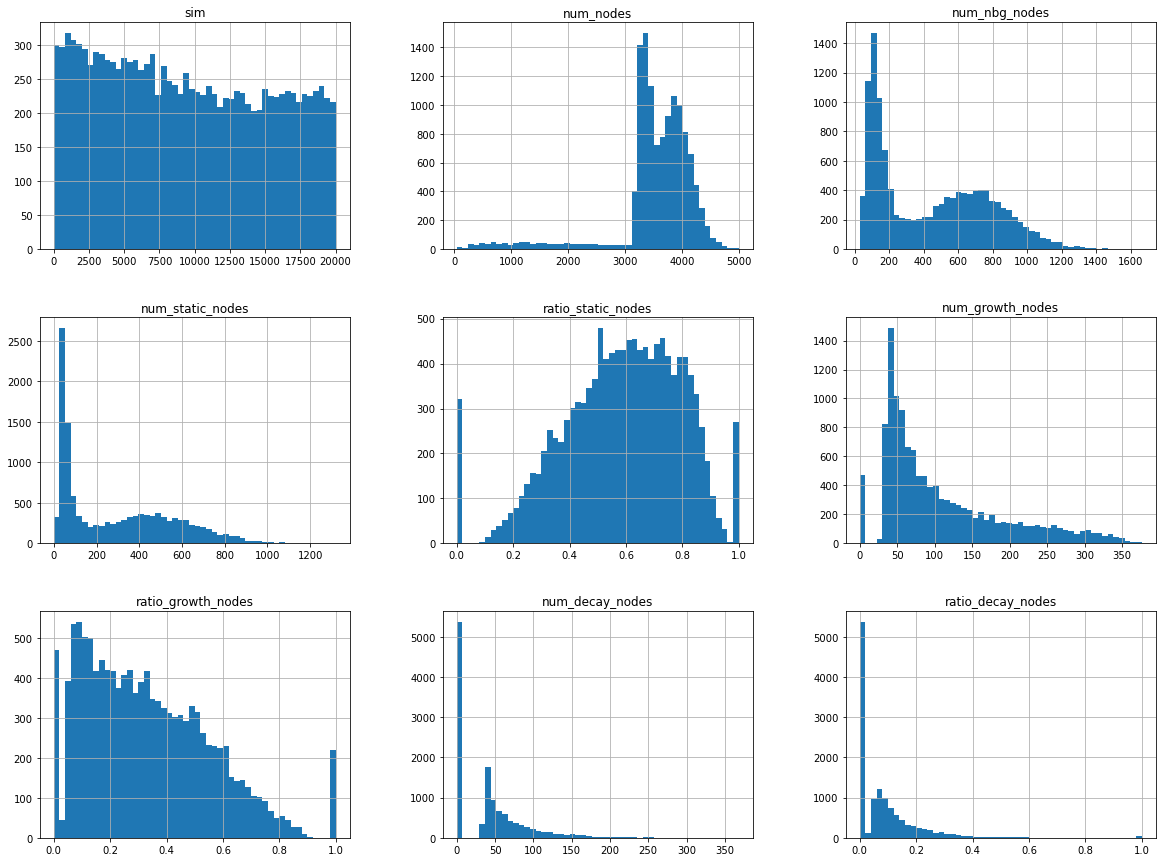

In [24]:
train_dist_df.hist(bins=50,figsize=(20,15))

In [32]:
train_dist_df

,sim,num_nodes,num_nbg_nodes,num_static_nodes,ratio_static_nodes,num_growth_nodes,ratio_growth_nodes,num_decay_nodes,ratio_decay_nodes
0,20000,3256,155,54,0.348387,36,0.232258,65,0.419355
1,11002,2871,94,46,0.489362,48,0.510638,0,0.000000
2,11004,3401,189,149,0.788360,40,0.211640,0,0.000000
3,11005,3178,104,59,0.567308,45,0.432692,0,0.000000
4,10100,3334,149,39,0.261745,110,0.738255,0,0.000000
...,...,...,...,...,...,...,...,...,...
12477,9969,3810,723,512,0.708160,67,0.092669,144,0.199170
12478,996,3889,600,403,0.671667,64,0.106667,133,0.221667
12479,9982,4010,490,299,0.610204,158,0.322449,33,0.067347
12480,9990,4006,931,756,0.812030,89,0.095596,86,0.092374


In [33]:
from collections import defaultdict
test_dist = defaultdict(list)
for tree_id in test_ids:
    test_dist['sim'].append(tree_id)
    onetree_node_df = node_df[node_df['sim'] == tree_id] 
    num_nodes = onetree_node_df.shape[0]
    nbg_num_nodes = len(onetree_node_df[onetree_node_df['cluster_id']!='Background'])
    test_dist['num_nodes'].append(num_nodes)
    test_dist['num_nbg_nodes'].append(nbg_num_nodes)
    #num_background_nodes = onetree_node_df[onetree_node_df['cluster_id']=='Background'].shape[0]
    #tree_dist_dict['num_background_nodes'].append(num_background_nodes)
    #tree_dist_dict[f'rat_background_nodes'].append(num_background_nodes / num_nodes)
    
    for label in ['static', 'growth', 'decay']:
        num_label_nodes = onetree_node_df[onetree_node_df['dynamic']==label].shape[0]
        test_dist[f'num_{label}_nodes'].append(num_label_nodes)
        test_dist[f'ratio_{label}_nodes'].append(num_label_nodes / nbg_num_nodes)
        
    #onetree_edge_df = edge_df[edge_df['sim'] == tree_id]
    # print(onetree_edge_df.shape)
    #test_dist['num_edges'].append(onetree_edge_df.shape[0])
    
test_dist_df = pd.DataFrame.from_dict(test_dist)

array([[<AxesSubplot:title={'center':'sim'}>,
        <AxesSubplot:title={'center':'num_nodes'}>,
        <AxesSubplot:title={'center':'num_nbg_nodes'}>],
       [<AxesSubplot:title={'center':'num_static_nodes'}>,
        <AxesSubplot:title={'center':'ratio_static_nodes'}>,
        <AxesSubplot:title={'center':'num_growth_nodes'}>],
       [<AxesSubplot:title={'center':'ratio_growth_nodes'}>,
        <AxesSubplot:title={'center':'num_decay_nodes'}>,
        <AxesSubplot:title={'center':'ratio_decay_nodes'}>]], dtype=object)

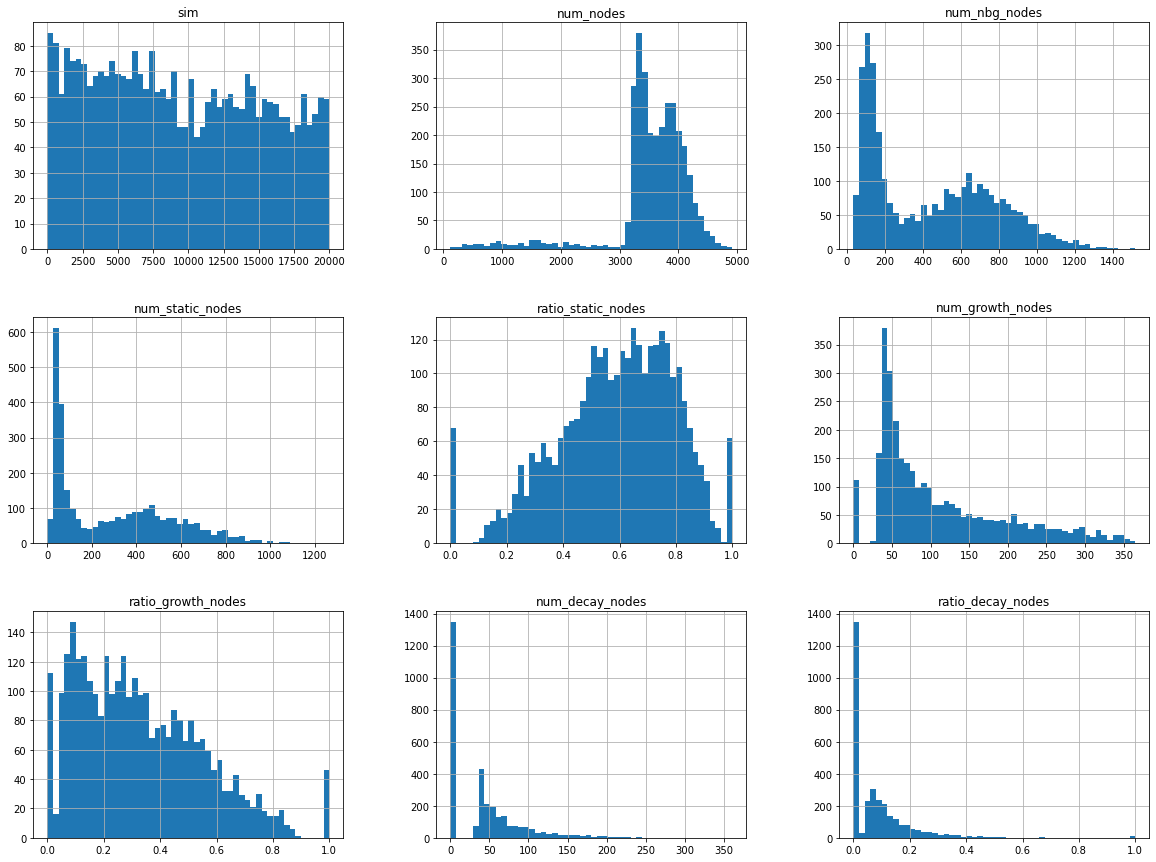

In [34]:
test_dist_df.hist(bins=50,figsize=(20,15))

In [35]:
test_dist_df.columns.values[1:]

array(['num_nodes', 'num_nbg_nodes', 'num_static_nodes',
       'ratio_static_nodes', 'num_growth_nodes', 'ratio_growth_nodes',
       'num_decay_nodes', 'ratio_decay_nodes'], dtype=object)

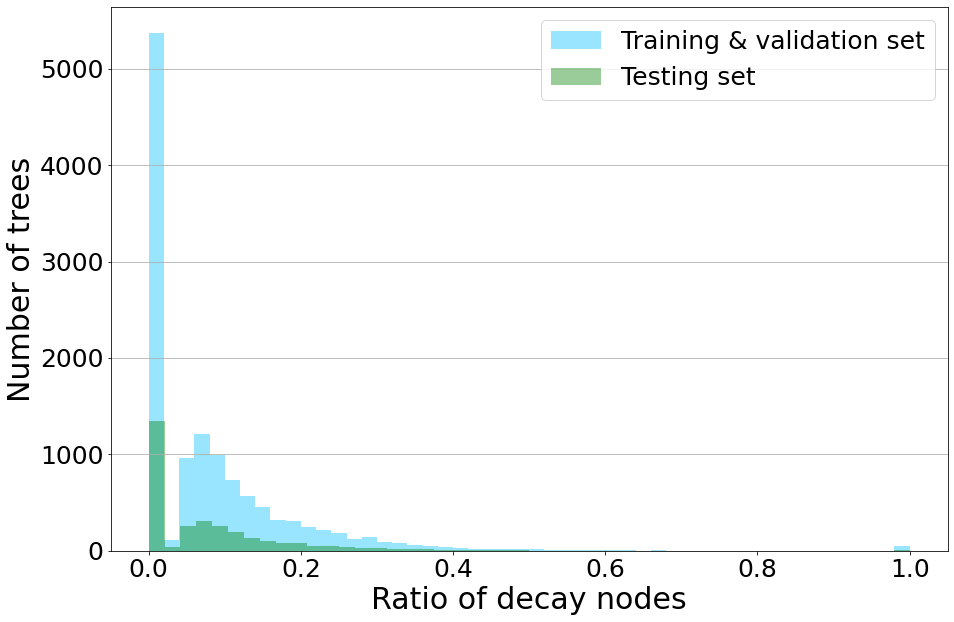

In [62]:
i = 7
feat = test_dist_df.columns.values[1:][i]
fig = plt.figure(figsize=[15,10])
plt.rcParams.update({'font.size': 25})
ax1 = fig.add_subplot(111)
#ax2 = ax1.twinx()
sns.distplot(train_dist_df[feat],hist=True,kde=False,rug=False,color='#00BFFF',label='Train & Validation Set',ax=ax1)
sns.distplot(test_dist_df[feat],bins=48,hist=True,kde=False,rug=False,color='green',label='Test Set',ax=ax1)
#ax1.set(ylim=(0,700))
ax1.axes.set_ylabel("Number of trees",fontsize=30)
ax1.axes.set_xlabel("Ratio of decay nodes",fontsize=30)
#Ratio of static nodes
#Number of static nodes
plt.grid(axis = "y")
ax1.legend(['Training & validation set','Testing set'],fontsize=25,loc=1)
fig.savefig(f"../../DeepDynaTree/paper/resp+tb/tree_feat/{feat}.svg",dpi=600,format='svg')

In [20]:
aly_edge_feat_cols = ['weight1', 'weight2','weight1_arsinh-norm', 'weight2_arsinh-norm']

In [21]:
train_edge_df = edge_df[edge_df['sim'].isin(train_ids)]
test_edge_df = edge_df[edge_df['sim'].isin(test_ids)]

In [22]:
x_name = [aly_edge_feat_cols[0],aly_edge_feat_cols[1],'Normalized arsinh weight1','Normalized arsinh weight2']
x_name

['weight1',
 'weight2',
 'Normalized arsinh weight1',
 'Normalized arsinh weight2']

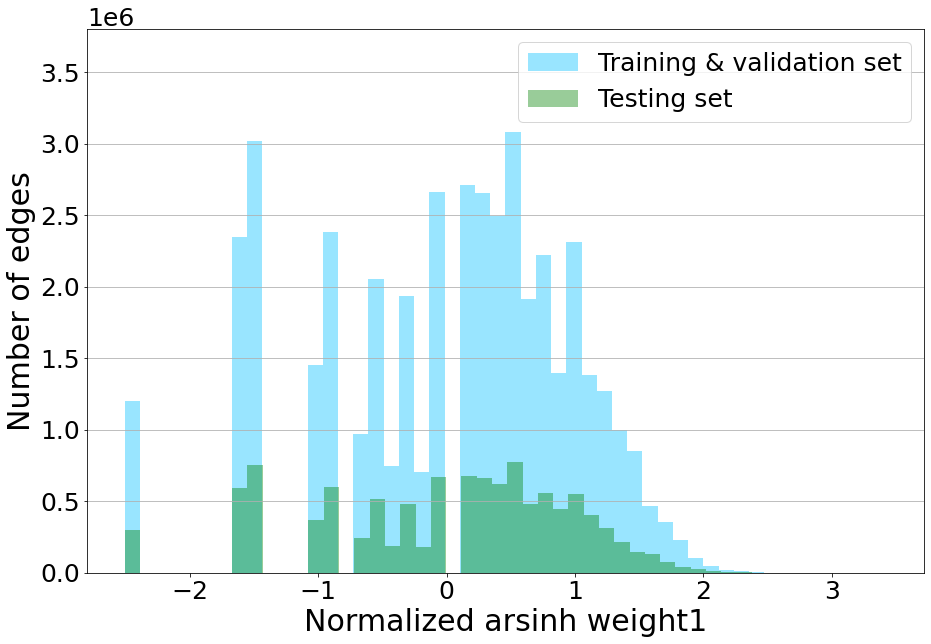

In [29]:
i = 2
feat = aly_edge_feat_cols[i]
fig = plt.figure(figsize=[15,10])
plt.rcParams.update({'font.size': 25})
ax1 = fig.add_subplot(111)
#ax2 = ax1.twinx()
sns.distplot(train_edge_df[feat],hist=True,kde=False,rug=False,color='#00BFFF',label='Train & Validation Set',ax=ax1)
sns.distplot(test_edge_df[feat],bins=49,hist=True,kde=False,rug=False,color='green',label='Test Set',ax=ax1)
ax1.set(ylim=(0,3800000))
ax1.axes.set_ylabel("Number of edges",fontsize=30)
ax1.axes.set_xlabel(f"{x_name[i]}",fontsize=30)
plt.grid(axis = "y")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.legend(['Training & validation set','Testing set'],fontsize=25,loc=1)
fig.savefig(f"../../DeepDynaTree/paper/resp+tb/edge_dist/{feat}.svg",dpi=600,format='svg')

### Build a tree with DGL

In [51]:
import networkx as nx
import matplotlib.pyplot as plt

In [52]:
# Load a tree from the train data
train_node_df = pd.read_csv(f'{split_folder}/train.csv')
vis_tree_id = train_ids[0]
print(vis_tree_id)

5405.0


In [53]:
onetree_node_df = train_node_df[train_node_df['sim'] == vis_tree_id] 
onetree_edge_df = train_edge_df[edge_df['sim'] == vis_tree_id]

/tmp/ipykernel_32458/2451865035.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  onetree_edge_df = train_edge_df[edge_df['sim'] == vis_tree_id]


In [54]:
onetree_node_df.head()

,sim,cluster_id,state,dynamic,dynamic_rparam,v_sampling_fraction,v_cluster_size,v_fraction_state,v_timespan,gamma,oster,PD,R0,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,cherries,BLD,date,node,gamma_bin,gamma_cat,ltt_shape_cat,dynamic_cat,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,new_R0,v_sampling_fraction-norm,v_cluster_size-norm,v_timespan-norm,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm
685900,5405.0,c1,B,static,0.0,0.872697,44.0,1.0,111.0,52.246881,111.004883,522.0,1.651867,53.211389,0.0,45.69029,convex,0.263158,0.0,2020-04-08,1937.0,"(-20.742, inf]",2,2,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.651867,1.182087,-0.719233,1.458313,1.458392,-0.628427,-0.011003,-1.249714,-0.027158,-0.327077,-0.51624,-0.394222
685901,5405.0,c1,B,static,0.0,0.872697,44.0,1.0,111.0,52.246881,111.004883,522.0,1.651867,53.211389,0.0,45.69029,convex,0.263158,0.0,2020-04-07,1936.0,"(-20.742, inf]",2,2,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.651867,1.182087,-0.719233,1.458313,1.458392,-0.628427,-0.011003,-1.249714,-0.027158,-0.327077,-0.51624,-0.394222
685902,5405.0,c1,B,static,0.0,0.872697,44.0,1.0,111.0,52.246881,111.004883,522.0,1.651867,53.211389,0.0,45.69029,convex,0.263158,0.0,2020-05-26,125.0,"(-20.742, inf]",2,2,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.651867,1.182087,-0.719233,1.458313,1.458392,-0.628427,-0.011003,-1.249714,-0.027158,-0.327077,-0.51624,-0.394222
685903,5405.0,c1,B,static,0.0,0.872697,44.0,1.0,111.0,52.246881,111.004883,522.0,1.651867,53.211389,0.0,45.69029,convex,0.263158,0.0,2020-04-24,1938.0,"(-20.742, inf]",2,2,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.651867,1.182087,-0.719233,1.458313,1.458392,-0.628427,-0.011003,-1.249714,-0.027158,-0.327077,-0.51624,-0.394222
685904,5405.0,c1,B,static,0.0,0.872697,44.0,1.0,111.0,52.246881,111.004883,522.0,1.651867,53.211389,0.0,45.69029,convex,0.263158,0.0,2020-03-27,29.0,"(-20.742, inf]",2,2,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.651867,1.182087,-0.719233,1.458313,1.458392,-0.628427,-0.011003,-1.249714,-0.027158,-0.327077,-0.51624,-0.394222


In [55]:
onetree_edge_df

,from,to,weight1,weight2,sim,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm
10066021,1911,1,1,0.000836,5405,0.881374,0.000836,-1.033461,-1.037620,-1.606488,-1.037732
10066022,1911,1912,24,0.020414,5405,3.871635,0.020413,1.939023,1.759957,1.387783,1.760093
10066023,1912,1913,1,0.000850,5405,0.881374,0.000850,-1.033461,-1.035592,-1.606488,-1.035704
10066024,1913,4,10,0.009050,5405,2.998223,0.009050,0.129685,0.136180,0.513200,0.136239
10066025,1913,1914,3,0.002441,5405,1.818446,0.002441,-0.774984,-0.808172,-0.668158,-0.808248
...,...,...,...,...,...,...,...,...,...,...,...
10069584,3568,36,2,0.001781,5405,1.443635,0.001781,-0.904222,-0.902588,-1.043472,-0.902679
10069585,3568,42,7,0.006671,5405,2.644121,0.006671,-0.258030,-0.203722,0.158623,-0.203707
10069586,1947,3569,10,0.008822,5405,2.998223,0.008822,0.129685,0.103612,0.513200,0.103668
10069587,3569,15,2,0.001729,5405,1.443635,0.001729,-0.904222,-0.910004,-1.043472,-0.910096


In [56]:
pip install pygraphviz==1.5

  Using cached pygraphviz-1.5.zip (117 kB)
  ERROR: Command errored out with exit status 1:
   command: /home/chaoyue/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-w4_8vew4/pygraphviz_d03e9824f5b74897a34ba89ce42eb250/setup.py'"'"'; __file__='"'"'/tmp/pip-install-w4_8vew4/pygraphviz_d03e9824f5b74897a34ba89ce42eb250/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-b2rp14hx
       cwd: /tmp/pip-install-w4_8vew4/pygraphviz_d03e9824f5b74897a34ba89ce42eb250/
  Complete output (58 lines):
  /home/chaoyue/anaconda3/lib/python3.8/site-packages/setuptools/dist.py:717: UserWarning: Usage of dash-separated 'build-requires' will not be supported in future versions. Please use the underscore

Note: you may need to restart the kernel to use updated packages.


In [57]:
import dgl
import networkx as nx
import torch
import pygraphviz as pgv

Using backend: pytorch


ModuleNotFoundError: No module named 'pygraphviz'

In [ ]:
src_ids = torch.tensor(onetree_edge_df['from'].values)
dst_ids = torch.tensor(onetree_edge_df['to'].values)

# Note: the start idx of the node is 0 not 1. But simulation node starts with 1
# We need substract 1 to the node idx for edges and nodes files.
src_ids -= 1
dst_ids -= 1

In [ ]:
g = dgl.graph((src_ids, dst_ids))
nx_g = dgl.to_networkx(g)

print(f'Nodes: {g.number_of_nodes()}')
print(f'Edges: {g.number_of_edges()}')

In [ ]:
g.nodes()

### Assign features to nodes

In [ ]:
sorted_onetree_node_df = onetree_node_df.sort_values(by='node')
print(sorted_onetree_node_df['node'].values)
n_nodes = sorted_onetree_node_df.shape[0]
sorted_onetree_node_df.tail()

In [ ]:
# Now using heatmaps
plt.figure(figsize=(15,8))
sns.heatmap(sorted_onetree_node_df.isnull(), cbar=False)

In [ ]:
# Next is to use the missingno library to analyze the missing values
import missingno as msno 

msno.bar(sorted_onetree_node_df,labels=True,fontsize=10) 

In [ ]:
g.ndata['feat'] = torch.tensor(sorted_onetree_node_df[node_feat_cols].values)
g.ndata['label'] = torch.tensor(sorted_onetree_node_df[label_feat_col].values)

for i in range(n_nodes):
    if not torch.all(torch.isnan(g.ndata['feat'][i])):
        print(f"NodeID: {i+1}, {g.ndata['feat'][i]}, {g.ndata['label'][i]}")
        break

### Assign features to edges

In [ ]:
g.edges()

In [ ]:
# The edge features are assigned to the edata according to the edge order, not considerring the src and dst
g.edata['feat'] = torch.tensor(onetree_edge_df[norm_edge_feat_cols].values)
g.edata['feat'][0]

In [ ]:
plt.figure(figsize=(20, 15))
color_map = []
node_labels = g.ndata['label'].numpy()
label_counter = defaultdict(lambda: 0)

for node_id in nx_g:
    node_label = node_labels[node_id]
    if np.isnan(node_label):
        label_counter['bg'] += 1
        color_map.append('gray')
    else:
        if node_label == 0:  # decay
            color_map.append('blue')
        elif node_label == 1:   # growth
            color_map.append('green')
        elif node_label == 2:   # static
            color_map.append('red')
        label_counter[node_label] += 1
            
print(label_counter)
pos = nx.nx_agraph.graphviz_layout(nx_g, prog='dot')
nx.draw(nx_g, pos, with_labels=False, node_size=30, node_color=color_map, alpha=.7, arrowsize=1)